<a href="https://colab.research.google.com/github/550tealeaves/DATA71200_sum2024_550/blob/main/data71200class3lab_answers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
!pip install mglearn
import mglearn
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix

     -------------------------------------- 581.4/581.4 kB 5.2 MB/s eta 0:00:00


# In-Class Activity 1

In [2]:
# Import the California Housing Data from used in the HOML book, Chapter 2
# Apply one-hot encoding to the ocean_proximity value

import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [3]:
fetch_housing_data()

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [4]:
housing = load_housing_data()

In [5]:
from sklearn.preprocessing import OrdinalEncoder # just to raise an ImportError if Scikit-Learn < 0.20
from sklearn.preprocessing import OneHotEncoder

housing_cat = housing['ocean_proximity'].values.reshape(-1,1)

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<20640x5 sparse matrix of type '<class 'numpy.float64'>'
	with 20640 stored elements in Compressed Sparse Row format>

In [6]:
housing_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

# In-Class Activity 2

In [7]:
# Apply binning to the housing_median_age value in the California Housing dataset that we looked at last class
# Plot both the original data and the binned data using matplotlib

from sklearn.preprocessing import KBinsDiscretizer
kb = KBinsDiscretizer(n_bins=10, strategy='uniform')
kb.fit(housing['housing_median_age'].values.reshape(-1, 1))
print("bin edges: \n", kb.bin_edges_)

bin edges: 
 [array([ 1. ,  6.1, 11.2, 16.3, 21.4, 26.5, 31.6, 36.7, 41.8, 46.9, 52. ])]


In [8]:
binned = kb.transform(housing['housing_median_age'].values.reshape(-1, 1))
binned

<20640x10 sparse matrix of type '<class 'numpy.float64'>'
	with 20640 stored elements in Compressed Sparse Row format>

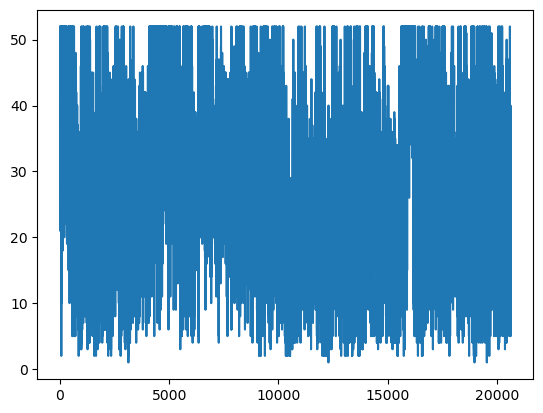

In [9]:
import matplotlib.pyplot as plt
plt.plot(housing['housing_median_age'].values.reshape(-1, 1))
plt.show()

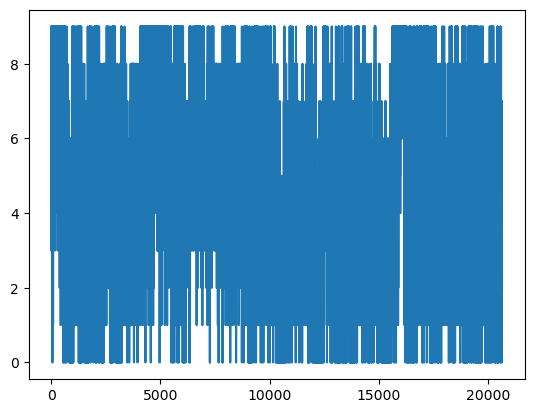

In [10]:
plt.plot(binned.argmax(1))
plt.show()

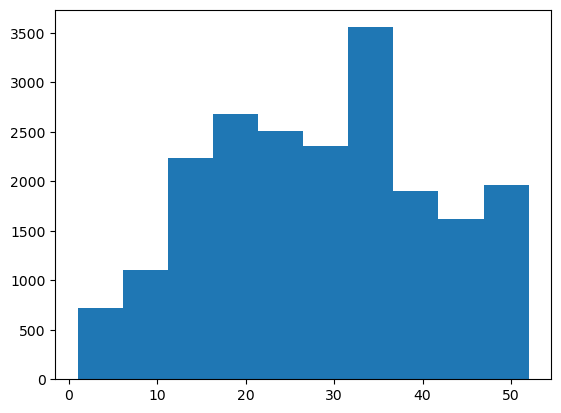

In [11]:
#Plot the histogram, divided into 10 bins
plt.hist(housing['housing_median_age'].values.reshape(-1, 1), bins=10)
plt.show()

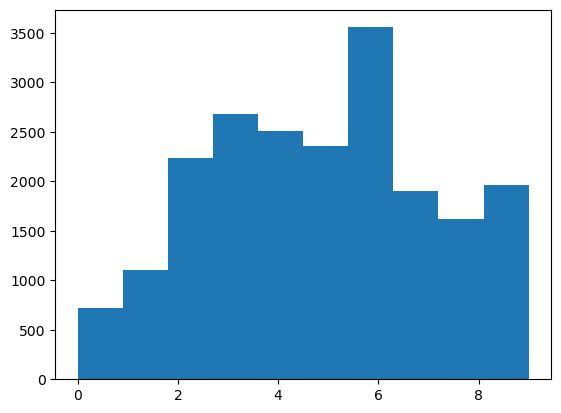

In [12]:
plt.hist(binned.argmax(1))
plt.show()

# In-Class Activity 3

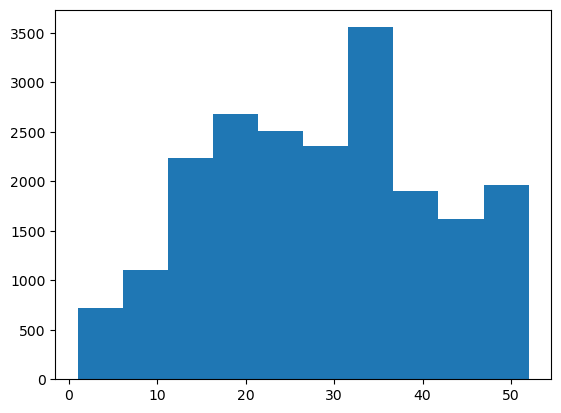

In [13]:
#Apply the following transformations to housing_median_age and median_income in the California Housing dataset
# Squaring (**2)
# Cubing (**3)
# np.log
# np.exp
# Plot histograms and scatter matrices to explore the resultant data

# housing_median_age
plt.hist(housing['housing_median_age'].values.reshape(-1, 1))
plt.show()

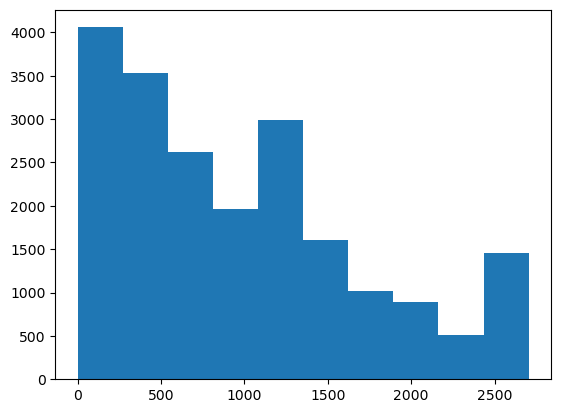

In [14]:
#SQUARED
#Plot histogram of with 10 bins and the values squared
plt.hist(housing['housing_median_age'].values.reshape(-1, 1)**2, bins=10)
plt.show()

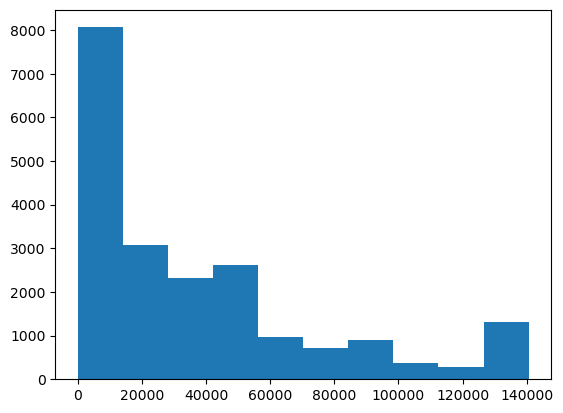

In [15]:
#CUBED
#Plot hist w/ 10 bins & values cubed
plt.hist(housing['housing_median_age'].values.reshape(-1, 1)**3, bins=10)
plt.show()

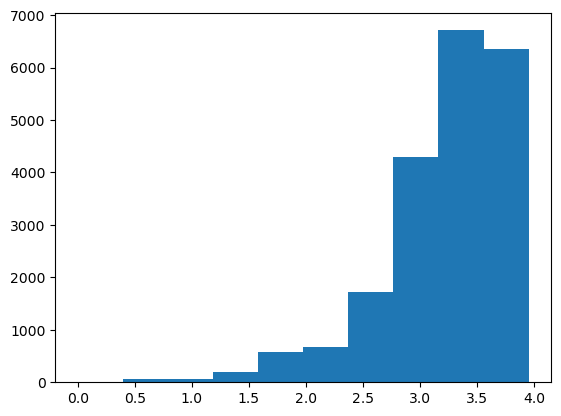

In [16]:
#np.log - make sure to import numpy as np
plt.hist(np.log(housing['housing_median_age'].values.reshape(-1, 1)), bins=10)
plt.show()

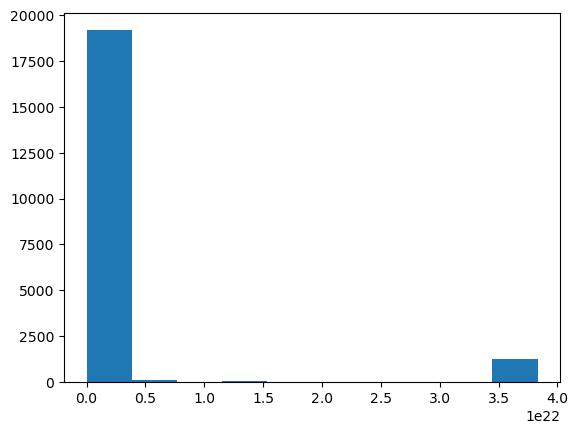

In [17]:
#np.exp - make sure to import numpy
plt.hist(np.exp(housing['housing_median_age'].values.reshape(-1, 1)), bins=10)
plt.show()

# **Redo the transformation using median_income feature**

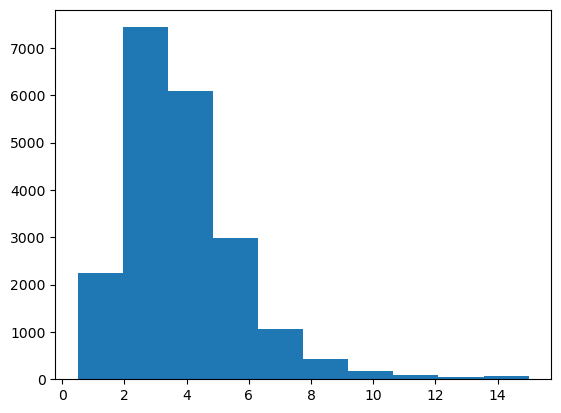

In [18]:
#Regular histogram
# median_income
plt.hist(housing['median_income'].values.reshape(-1, 1))
plt.show()

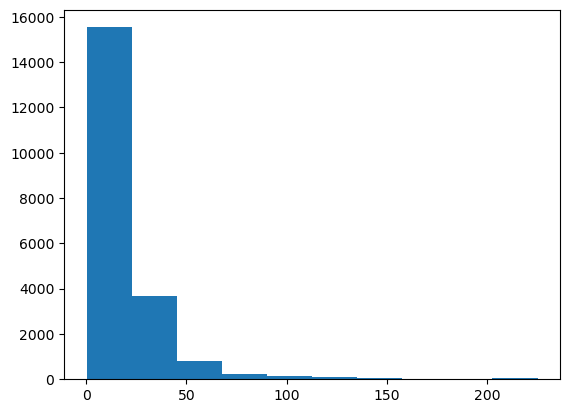

In [19]:
#SQUARED with 10 bins
plt.hist(housing['median_income'].values.reshape(-1, 1)**2, bins=10)
plt.show()

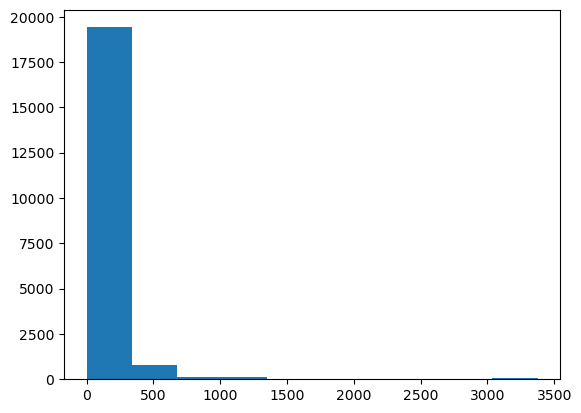

In [20]:
#CUBED with 10 bins
plt.hist(housing['median_income'].values.reshape(-1, 1)**3, bins=10)
plt.show()

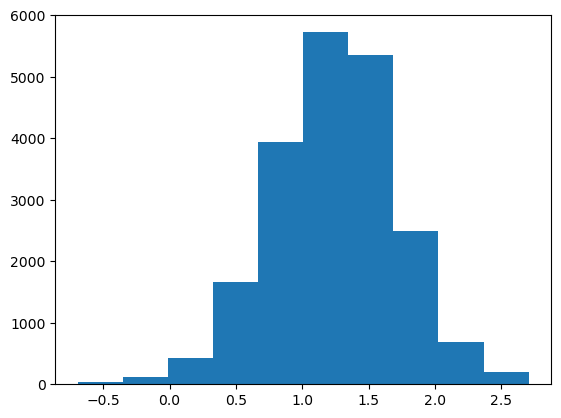

In [21]:
#np.log
plt.hist(np.log(housing['median_income'].values.reshape(-1, 1)), bins=10)
plt.show()

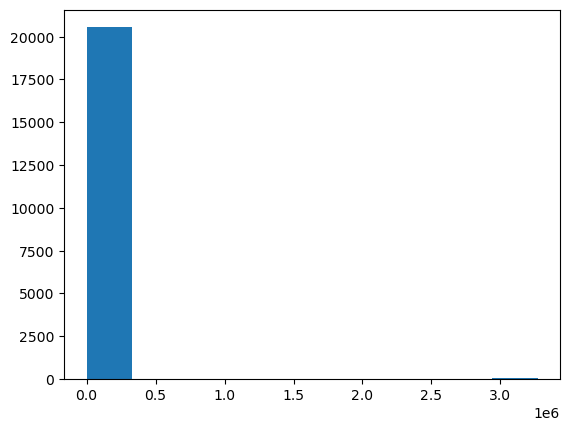

In [22]:
#np.exp
plt.hist(np.exp(housing['median_income'].values.reshape(-1, 1)), bins=10)
plt.show()

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>]],
      dtype=object)

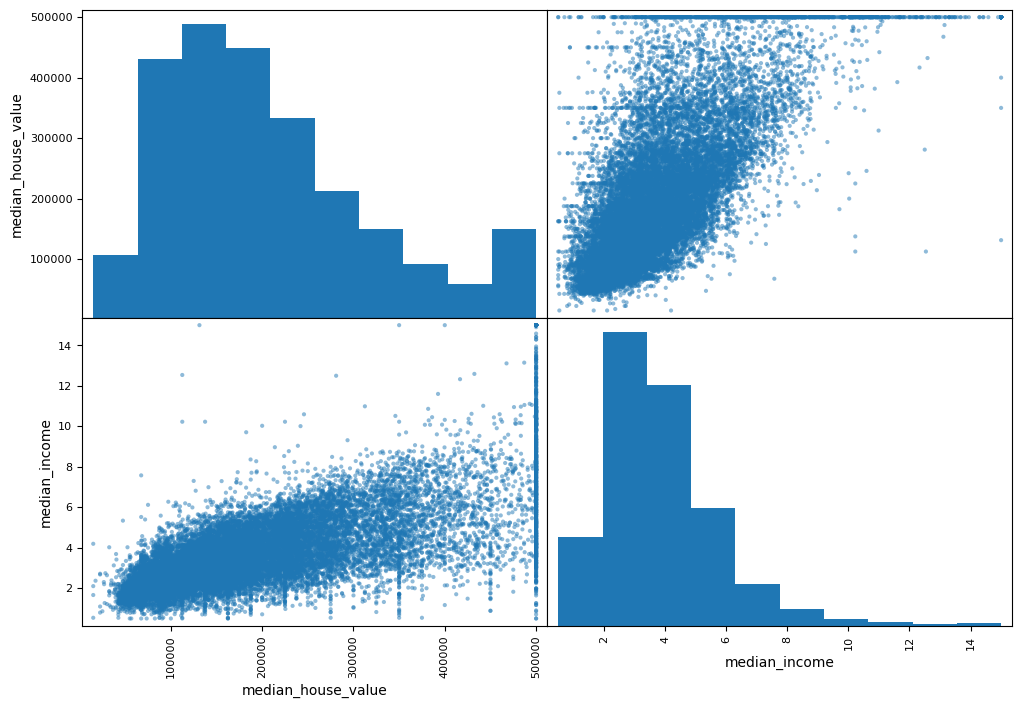

In [23]:
#scatter matrix for the ORIGINAL data for house_median_age and median_income

attributes = ["median_house_value", "median_income"]
scatter_matrix(housing[attributes], figsize=(12, 8))

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>]],
      dtype=object)

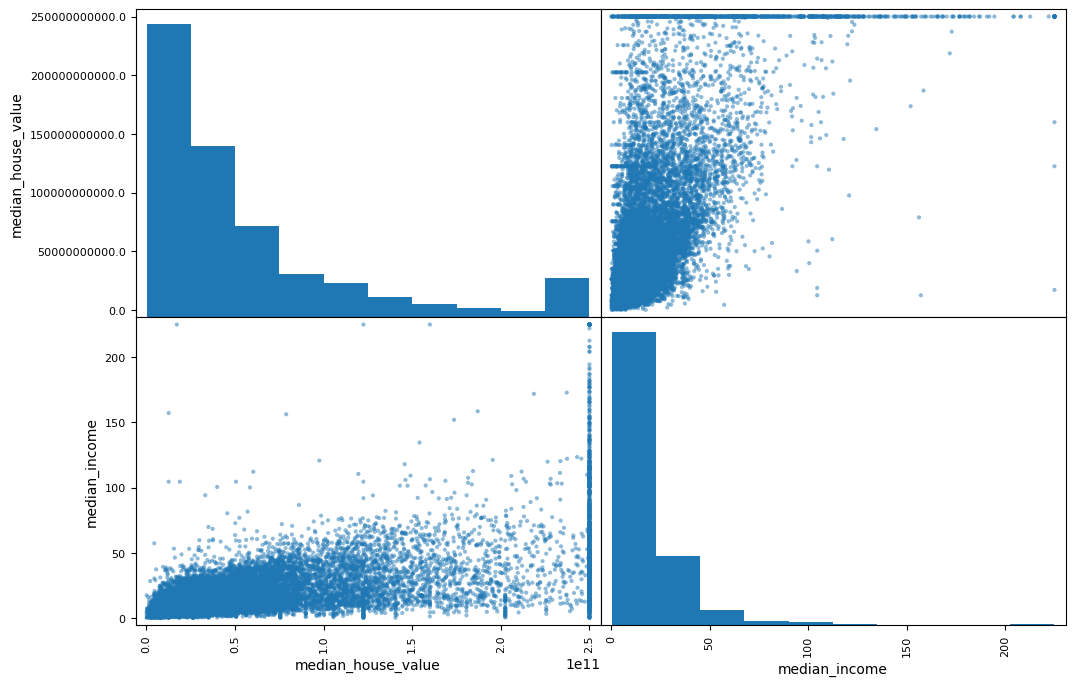

In [24]:
#scatter matrix for the SQUARED data for house_median_age and median_income
scatter_matrix(housing[attributes]**2, figsize=(12, 8))

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>]],
      dtype=object)

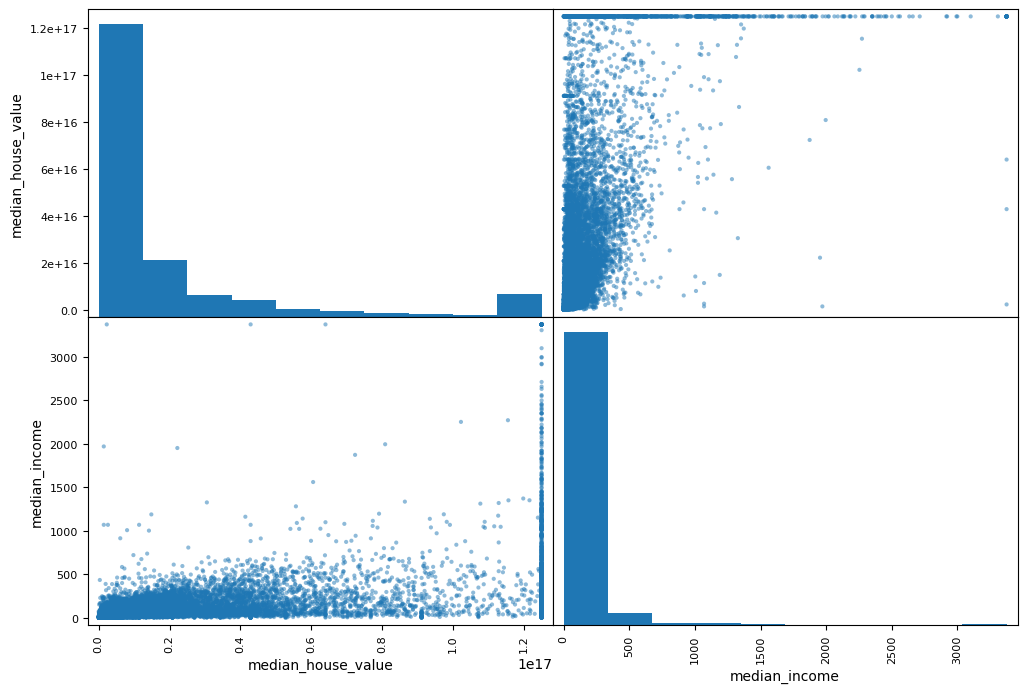

In [25]:
#scatter matrix for the CUBED data for house_median_age and median_income
scatter_matrix(housing[attributes]**3, figsize=(12, 8))